In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import keras library
import keras
# import Sequential from the keras models module
from keras import Sequential
# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
y = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/fruit_vegetable/y.csv",delimiter=',')
x = np.load('C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/fruit_vegetable/image_pixel_200.npy') # loading it
from sklearn.model_selection import train_test_split
x_tra,x_val,y_tra,y_val = train_test_split(x,y,test_size=0.1,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x_tra,y_tra,test_size=0.2,random_state=42)
# examine number of samples in train, test, and validation sets
print(y.shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

(336, 2)
x_train shape: (241, 200, 200, 3)
241 train samples
61 test samples
34 validation samples


In [3]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [4]:
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [5]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5)
modelCheckpoint = ModelCheckpoint('best_model_simple.hdf5',save_best_only=True)

In [6]:
def create_model(learning_rate,kernel,acti_function,acti_output,loss_f):
    opt = Adam(lr=learning_rate)
    model = Sequential()
    model.add(Conv2D(50,kernel_size=kernel,activation=acti_function,input_shape=(200,200,3)))
    model.add(MaxPooling2D(4))
    model.add(Conv2D(25,kernel_size=kernel,activation=acti_function))
    model.add(MaxPooling2D(3))
    model.add(Flatten())
    model.add(Dense(2,activation=acti_output))
    model.compile(optimizer = opt, loss=loss_f,metrics=['accuracy'])
    return model

In [7]:
best_model = create_model(learning_rate = 0.001 , kernel = 2, acti_function = 'sigmoid',
                          acti_output = 'sigmoid', loss_f = 'binary_crossentropy')

In [8]:
h_callback = best_model.fit(x_train, y_train,epochs = 100, batch_size = 20,
                    callbacks = [early_stopping,modelCheckpoint],
                    validation_split = 0.3)

Train on 168 samples, validate on 73 samples
Epoch 1/100
168/168 [==============================] - 3s 20ms/step - loss: 0.8482 - accuracy: 0.5536 - val_loss: 0.7601 - val_accuracy: 0.6438
Epoch 2/100
168/168 [==============================] - 3s 17ms/step - loss: 0.8160 - accuracy: 0.4375 - val_loss: 0.6610 - val_accuracy: 0.6438
Epoch 3/100
168/168 [==============================] - 3s 17ms/step - loss: 0.7285 - accuracy: 0.5327 - val_loss: 0.7564 - val_accuracy: 0.3562
Epoch 4/100
168/168 [==============================] - 3s 17ms/step - loss: 0.6988 - accuracy: 0.5030 - val_loss: 0.6410 - val_accuracy: 0.6438
Epoch 5/100
168/168 [==============================] - 3s 17ms/step - loss: 0.6896 - accuracy: 0.4792 - val_loss: 0.6643 - val_accuracy: 0.7055
Epoch 6/100
168/168 [==============================] - 3s 17ms/step - loss: 0.6631 - accuracy: 0.5923 - val_loss: 0.6380 - val_accuracy: 0.6370
Epoch 7/100
168/168 [==============================] - 3s 17ms/step - loss: 0.6557 - accura

In [9]:
best_model.evaluate(x_train,y_train)

241/241 [==============================] - 1s 4ms/step


[0.5396231954523142, 0.7634854912757874]

In [10]:
best_model.evaluate(x_test,y_test)

61/61 [==============================] - 0s 4ms/step


[0.5839521718806908, 0.7049180269241333]

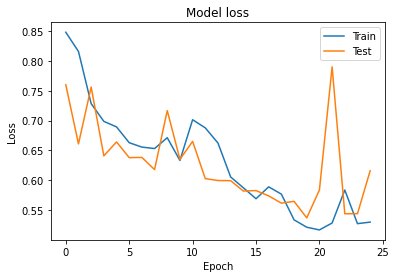

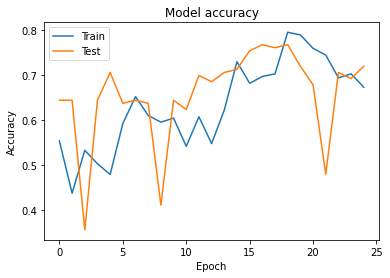

In [11]:
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

In [12]:
from keras.models import model_from_json
#serialize model to JSON
model_json = best_model.to_json()
with open("model_simple.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
best_model.save_weights("model_simple.h5")
print("Saved model to disk")

Saved model to disk
